In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../Dataset/BracBank.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2007-02-14,5.45,5.57,5.13,5.21,8.230592e+06
1,2007-02-15,5.54,5.82,5.54,5.63,2.666820e+07
2,2007-02-19,5.25,5.39,5.22,5.30,8.539239e+06
3,2007-02-20,5.36,5.36,5.10,5.15,1.550275e+07
4,2007-02-22,5.09,5.19,4.85,4.90,1.308772e+07


In [4]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,2907.000000,2907.000000,2907.000000,2907.000000,2.907000e+03
mean,26.020791,26.393760,25.641359,25.977107,3.171766e+06
std,16.823499,17.022977,16.568481,16.772077,4.249563e+06
min,4.480000,4.620000,4.460000,4.560000,5.892075e+02
25%,11.860000,12.130000,11.700000,11.890000,7.853634e+05
50%,17.720000,17.960000,17.530000,17.770000,1.674354e+06
75%,42.520000,43.060000,41.960000,42.495000,3.674490e+06
max,64.500000,65.930000,63.140000,64.320000,4.587806e+07


In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2007-03-05')


In [7]:
datetime_object

datetime.datetime(2007, 3, 5, 0, 0)

In [8]:
WorkingData = df.copy()

In [9]:
WorkingData['Date'] = WorkingData['Date'].apply(str_to_datetime)

In [10]:
WorkingData['Date']

0      2007-02-14
1      2007-02-15
2      2007-02-19
3      2007-02-20
4      2007-02-22
          ...    
2902   2022-08-04
2903   2022-08-08
2904   2022-08-10
2905   2022-08-11
2906   2022-08-16
Name: Date, Length: 2907, dtype: datetime64[ns]

In [11]:
WorkingData.index = WorkingData.pop('Date')

In [12]:
WorkingData.index

DatetimeIndex(['2007-02-14', '2007-02-15', '2007-02-19', '2007-02-20',
               '2007-02-22', '2007-02-26', '2007-02-27', '2007-02-28',
               '2007-03-01', '2007-03-05',
               ...
               '2022-07-27', '2022-07-28', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-08', '2022-08-10',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=2907, freq=None)

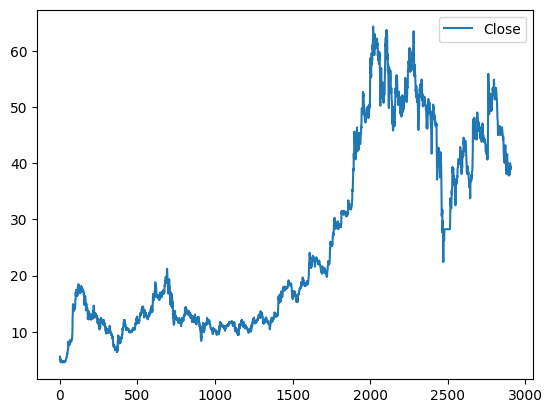

In [18]:
plt.plot(df.index, df['Close'])
plt.legend(['Close'])

In [16]:
WorkingData["Tomorrow"] = WorkingData["Close"].shift(-1)

In [20]:
WorkingData.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-02-14,5.45,5.57,5.13,5.21,8.230592e+06,5.63
2007-02-15,5.54,5.82,5.54,5.63,2.666820e+07,5.30
2007-02-19,5.25,5.39,5.22,5.30,8.539239e+06,5.15
2007-02-20,5.36,5.36,5.10,5.15,1.550275e+07,4.90
2007-02-22,5.09,5.19,4.85,4.90,1.308772e+07,4.61


In [21]:
WorkingData["Target"] = (WorkingData["Tomorrow"] > WorkingData["Close"]).astype(int)

In [25]:
WorkingData.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-02-14,5.45,5.57,5.13,5.21,8.230592e+06,5.63,1
2007-02-15,5.54,5.82,5.54,5.63,2.666820e+07,5.30,0
2007-02-19,5.25,5.39,5.22,5.30,8.539239e+06,5.15,0
2007-02-20,5.36,5.36,5.10,5.15,1.550275e+07,4.90,0
2007-02-22,5.09,5.19,4.85,4.90,1.308772e+07,4.61,0


In [28]:
WorkingData["Target"].value_counts()

0    1607
1    1300
Name: Target, dtype: int64

In [61]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = WorkingData.index
    middle_matrix = df_as_np[0:, 0:4]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(WorkingData)
dates.shape, X.shape, y.shape

((2907,), (2907, 4, 1), (2907,))

In [62]:
dates

DatetimeIndex(['2007-02-14', '2007-02-15', '2007-02-19', '2007-02-20',
               '2007-02-22', '2007-02-26', '2007-02-27', '2007-02-28',
               '2007-03-01', '2007-03-05',
               ...
               '2022-07-27', '2022-07-28', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-08', '2022-08-10',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=2907, freq=None)

In [63]:
X

array([[[ 5.45],
        [ 5.57],
        [ 5.13],
        [ 5.21]],

       [[ 5.54],
        [ 5.82],
        [ 5.54],
        [ 5.63]],

       [[ 5.25],
        [ 5.39],
        [ 5.22],
        [ 5.3 ]],

       ...,

       [[39.8 ],
        [39.8 ],
        [38.8 ],
        [39.5 ]],

       [[39.  ],
        [39.4 ],
        [38.8 ],
        [38.9 ]],

       [[39.7 ],
        [39.7 ],
        [38.9 ],
        [39.  ]]], dtype=float32)

In [47]:
Y

,Target
Date,
2007-02-14,1
2007-02-15,0
2007-02-19,0
2007-02-20,0
2007-02-22,0
...,...
2022-08-04,0
2022-08-08,1
2022-08-10,0


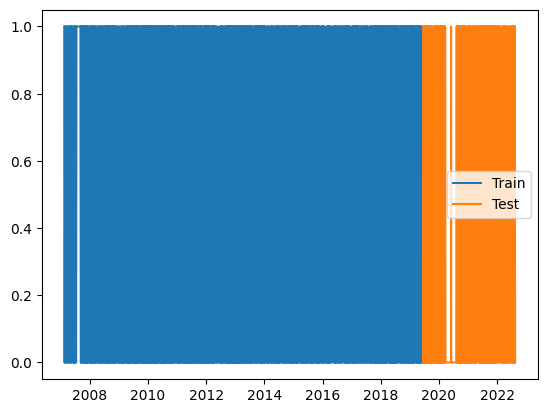

In [67]:
q_80 = int(len(dates) * .8)
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_test, X_test, y_test = dates[q_80:], X[q_80:], y[q_80:]
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Test'])

In [29]:
X = pd.DataFrame(WorkingData,columns=[ 'Open', 'High', 'Low', 'Close', 'Volume'])
Y = pd.DataFrame(WorkingData,columns=['Target'])

In [30]:
Y.shape

(2907, 1)

In [31]:
X

,Open,High,Low,Close,Volume
Date,,,,,
2007-02-14,5.45,5.57,5.13,5.21,8.230592e+06
2007-02-15,5.54,5.82,5.54,5.63,2.666820e+07
2007-02-19,5.25,5.39,5.22,5.30,8.539239e+06
2007-02-20,5.36,5.36,5.10,5.15,1.550275e+07
2007-02-22,5.09,5.19,4.85,4.90,1.308772e+07
...,...,...,...,...,...
2022-08-04,40.60,40.80,39.60,40.00,7.309170e+05
2022-08-08,39.50,39.70,39.00,39.20,9.789490e+05
2022-08-10,39.80,39.80,38.80,39.50,1.344274e+06


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle= True, random_state=1)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"], 
    "max_features": ["sqrt", "log2"],"min_samples_split": [2, 5, 10],
}

rf = RandomForestClassifier(n_estimators=100)

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)

# get feature importance of the best estimator
feature_importance = grid.best_estimator_.feature_importances_
print('Feature importance:', feature_importance)


Best estimator: RandomForestClassifier(max_features='log2')
Best params: {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2}
Feature importance: [0.1965142  0.19170817 0.18485983 0.1916555  0.2352623 ]


In [41]:
results = pd.concat([pd.DataFrame(grid.cv_results_["params"]), pd.DataFrame(grid.cv_results_["mean_test_score"],columns =["Validation Accuracy"] )], axis = 1)
results

,criterion,max_features,min_samples_split,Validation Accuracy
0,gini,sqrt,2,0.534226
1,gini,sqrt,5,0.532501
2,gini,sqrt,10,0.535065
3,gini,log2,2,0.540232
4,gini,log2,5,0.533341
5,gini,log2,10,0.538941
6,entropy,sqrt,2,0.539807
7,entropy,sqrt,5,0.523026
8,entropy,sqrt,10,0.532061
9,entropy,log2,2,0.527755


In [42]:
print('Best estimator:', grid.best_score_)

Best estimator: 0.5402323516353411


### Random Forest Classifier

In [40]:
# from sklearn.ensemble import RandomForestClassifier

In [43]:
# model = RandomForestClassifier(n_estimators = 500, min_samples_split = 100, random_state = 1)

# train = WorkingData.iloc[:-100]
# test = WorkingData.iloc[-100:]

# predictors = ["Close", "Volume", "Open", "High", "Low"]

# model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=1)

In [45]:
# from sklearn.metrics import precision_score 

# preds = model.predict(test[predictors])

In [46]:
# perds = pd.Series(preds, index = test.index)

In [49]:
# precision_score(test["Target"], preds)

0.3333333333333333

In [55]:
# combined = pd.concat([test["Target"], preds], axis=1)

In [56]:
# def predict(train, test, predictors, model):
#     model.fit(train[predictors], train["Target"])
#     preds = model.predict(test[predictors])
#     preds = pd.Series(preds, index = test.index, name="Predictions")
#     combined = pd.concat([test["Target"], preds], axis=1)
#     return combined

In [57]:
# def backtest(data, model, predictors, start=5000, step=250):
#     all_predictions = []
    
#     for i in range(start, data.shape[0], step):
#         train = data.iloc[0:i].copy()
#         test = data.iloc[i:(i+step)].copy()
#         predictions = predict(train, test, predictiors, model)
#         all_predictions.append(predictions)
#     return pd.concat(all_predictions)

In [15]:
# predictions = backtest(WorkingData, model, predictors)

In [21]:
df = df[['Date', 'Close']]
df.head(10)

,Date,Close
0,2007-02-14,5.21
1,2007-02-15,5.63
2,2007-02-19,5.30
3,2007-02-20,5.15
4,2007-02-22,4.90
5,2007-02-26,4.61
6,2007-02-27,5.07
7,2007-02-28,5.00
8,2007-03-01,4.99
9,2007-03-05,4.73


In [22]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2007-03-05')
datetime_object

datetime.datetime(2007, 3, 5, 0, 0)

In [23]:
df['Date'] = df['Date'].apply(str_to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['Date']

0      2007-02-14
1      2007-02-15
2      2007-02-19
3      2007-02-20
4      2007-02-22
          ...    
2902   2022-08-04
2903   2022-08-08
2904   2022-08-10
2905   2022-08-11
2906   2022-08-16
Name: Date, Length: 2907, dtype: datetime64[ns]

In [25]:
df.index = df.pop('Date')

In [26]:
df.index

DatetimeIndex(['2007-02-14', '2007-02-15', '2007-02-19', '2007-02-20',
               '2007-02-22', '2007-02-26', '2007-02-27', '2007-02-28',
               '2007-03-01', '2007-03-05',
               ...
               '2022-07-27', '2022-07-28', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-08', '2022-08-10',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=2907, freq=None)

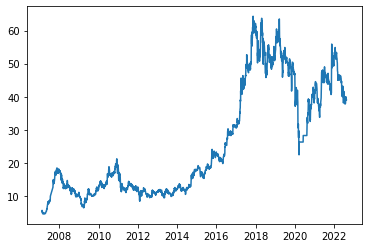

In [27]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [28]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  #print(target_date)
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    #print(df_subset)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=100)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n+1):
    X[:, i]
    ret_df[f'Target-{n+1-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [29]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2007-03-05', 
                                '2022-08-11',                         
                                n=5)
windowed_df

,Target Date,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2007-03-05,5.15,4.90,4.61,5.07,5.00,4.99,4.73
1,2007-03-06,4.90,4.61,5.07,5.00,4.99,4.73,4.81
2,2007-03-07,4.61,5.07,5.00,4.99,4.73,4.81,4.87
3,2007-03-08,5.07,5.00,4.99,4.73,4.81,4.87,4.77
4,2007-03-12,5.00,4.99,4.73,4.81,4.87,4.77,4.60
...,...,...,...,...,...,...,...,...
2892,2022-08-03,38.90,39.20,38.50,37.90,38.80,39.40,39.90
2893,2022-08-04,39.20,38.50,37.90,38.80,39.40,39.90,40.00
2894,2022-08-08,38.50,37.90,38.80,39.40,39.90,40.00,39.20
2895,2022-08-10,37.90,38.80,39.40,39.90,40.00,39.20,39.50


In [30]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2897,), (2897, 6, 1), (2897,))

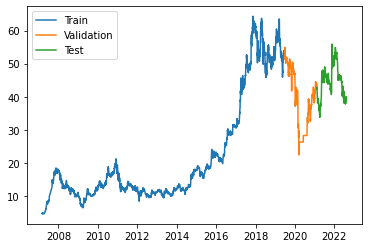

In [31]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90,]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((6, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='mse',
#     metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [33]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
73/73 [==============================] - 4s 18ms/step - loss: 192.5741 - mean_absolute_error: 7.9087 - val_loss: 1.7397 - val_mean_absolute_error: 0.9688
Epoch 2/100
73/73 [==============================] - 1s 11ms/step - loss: 0.5959 - mean_absolute_error: 0.4863 - val_loss: 1.5540 - val_mean_absolute_error: 0.9204
Epoch 3/100
73/73 [==============================] - 1s 11ms/step - loss: 0.5354 - mean_absolute_error: 0.4646 - val_loss: 1.6104 - val_mean_absolute_error: 0.9816
Epoch 4/100
73/73 [==============================] - 1s 11ms/step - loss: 0.5285 - mean_absolute_error: 0.4646 - val_loss: 1.6379 - val_mean_absolute_error: 0.9783
Epoch 5/100
73/73 [==============================] - 1s 11ms/step - loss: 0.6286 - mean_absolute_error: 0.5251 - val_loss: 1.0445 - val_mean_absolute_error: 0.6976
Epoch 6/100
73/73 [==============================] - 1s 11ms/step - loss: 0.7712 - mean_absolute_error: 0.5847 - val_loss: 1.2955 - val_mean_absolute_error: 0.8469
Epoch 7/100
73

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                

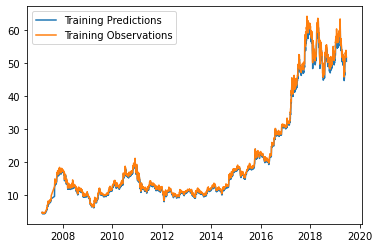

In [35]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [36]:
results = model.evaluate(X_train, y_train)

73/73 [==============================] - 0s 4ms/step - loss: 0.7495 - mean_absolute_error: 0.6000


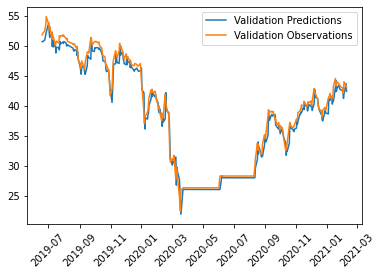

In [37]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation = 45)
plt.legend(['Validation Predictions', 'Validation Observations'])

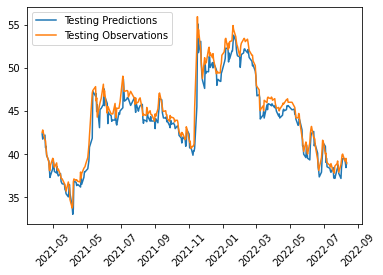

In [38]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation = 45)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [39]:
results = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 5ms/step - loss: 1.4727 - mean_absolute_error: 0.9096


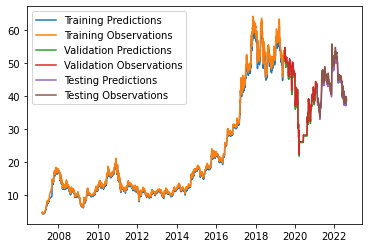

In [40]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])